【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [1]:
import numpy as np

ndarray = np.array(range(4))
b_ndarray = ndarray.reshape(2,2)
print(b_ndarray)

repeat=0

for i in range(2):
    for j in range(2):
        b_ndarray[i][j] = 2**(repeat)
        repeat += 1

print("\n各マスの小麦数・・・")
print(b_ndarray)


[[0 1]
 [2 3]]

各マスの小麦数・・・
[[1 2]
 [4 8]]


【問題2】n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

＜ＭＥＭＯ＞　8✕8の場合、配列型がint32ではオーバーフローしてしまう。dtype=uint64とする。

In [15]:
import numpy as np

def board_ndarray(column,row):
    ndarray = np.array(range(column*row),dtype = np.uint64)
    temp_ndarray = ndarray.reshape(column,row)
    repeat=0
    for i in range(column):
        for j in range(row):
            temp_ndarray[i][j] = 2**(repeat)
            repeat += 1
    return temp_ndarray

print("\n各マスの小麦数・・・\n")
#np.set_printoptions(precision=4)

input_column = 8
input_row =8

b_ndarray=board_ndarray(input_column,input_row)
print(b_ndarray)


各マスの小麦数・・・

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     14

【問題3】小麦の数の合計

小麦の合計粒数：1.8446744073709552e+19
0番目の軸方向の合計は[9.0425e+15 1.8085e+16 3.6170e+16 7.2340e+16 1.4468e+17 2.8936e+17
 5.7872e+17 1.1574e+18]


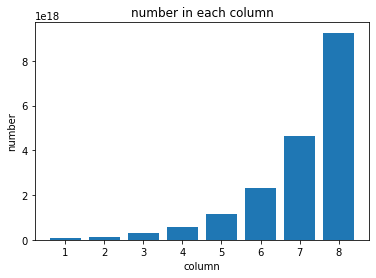

In [16]:
wheat_sum = 0

for i in range(input_column):
    for j in range(input_row):
        wheat_sum += b_ndarray[i][j]

print("小麦の合計粒数：{}".format(wheat_sum))
column_sum_b_ndarray = b_ndarray.sum(axis=0)
print("0番目の軸方向の合計は{}".format(b_ndarray.mean(axis=0)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,input_column+1), column_sum_b_ndarray)
plt.show()

【問題４】小麦の数のヒートマップ

＜メモ＞　ヒートマップでは左下が１行１列目、右上が８行８列目なので、正しく表示されていると考える。

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

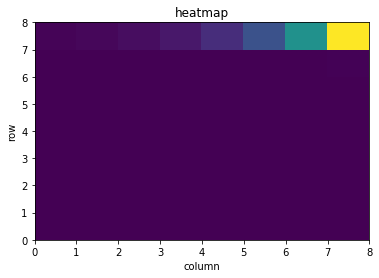

In [17]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(b_ndarray)
print(b_ndarray)
plt.show()

【問題5】後半は前半の何倍か

In [18]:
row_sum_b_ndarray = b_ndarray.sum(axis=1)
print("1番目の軸方向の合計は{}".format(b_ndarray.sum(axis=1)))

#前半の合計値を求める。
former_sum = 0
for i in range(4):
    former_sum += row_sum_b_ndarray[i]
print("前半の合計値:{}".format(former_sum))

#後半の合計値を求める。
latter_sum = 0
for i in range(4,8):
    latter_sum += row_sum_b_ndarray[i]
print("後半の合計値:{}".format(latter_sum))

#後半の合計値を、前半の合計値で除す。
print("後半は前半の{}倍である。".format(latter_sum/former_sum))

1番目の軸方向の合計は[                 255                65280             16711680
           4278190080        1095216660480      280375465082880
    71776119061217280 18374686479671623680]
前半の合計値:4294967295.0
後半の合計値:1.8446744069414584e+19
後半は前半の4294967296.0倍である。


【問題６】他の計算方法によるn×mマスへの拡張

In [19]:
import numpy as np
#np.append()を使う場合。
def board_ndarray1(column,row):
    ndarray = np.array([1]).astype(np.uint64)
    for i in range(column*row-1):
        ndarray = np.append(ndarray,2*ndarray[-1])
    b_ndarray=ndarray.reshape(column,row)
    return b_ndarray

print(board_ndarray1(8,8))

[[1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
  6.4000e+01 1.2800e+02]
 [2.5600e+02 5.1200e+02 1.0240e+03 2.0480e+03 4.0960e+03 8.1920e+03
  1.6384e+04 3.2768e+04]
 [6.5536e+04 1.3107e+05 2.6214e+05 5.2429e+05 1.0486e+06 2.0972e+06
  4.1943e+06 8.3886e+06]
 [1.6777e+07 3.3554e+07 6.7109e+07 1.3422e+08 2.6844e+08 5.3687e+08
  1.0737e+09 2.1475e+09]
 [4.2950e+09 8.5899e+09 1.7180e+10 3.4360e+10 6.8719e+10 1.3744e+11
  2.7488e+11 5.4976e+11]
 [1.0995e+12 2.1990e+12 4.3980e+12 8.7961e+12 1.7592e+13 3.5184e+13
  7.0369e+13 1.4074e+14]
 [2.8147e+14 5.6295e+14 1.1259e+15 2.2518e+15 4.5036e+15 9.0072e+15
  1.8014e+16 3.6029e+16]
 [7.2058e+16 1.4412e+17 2.8823e+17 5.7646e+17 1.1529e+18 2.3058e+18
  4.6117e+18 9.2234e+18]]


In [20]:
import numpy as np
#ブロードキャストを使う場合。
def board_ndarray2(column,row):
    ndarray = np.arange(column*row).astype(np.uint64)
    ndarray=2**ndarray
    b_ndarray=ndarray.reshape(column,row)
    return b_ndarray

print(board_ndarray2(8,8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

【問題7】計算時間の比較

In [6]:
%%timeit
import numpy as np
def board_ndarray(column,row):
    ndarray = np.array(range(column*row),dtype = np.uint64)
    temp_ndarray = ndarray.reshape(column,row)
    repeat=0
    for i in range(column):
        for j in range(row):
            temp_ndarray[i][j] = 2**(repeat)
            repeat += 1
    return temp_ndarray

input_column = 8
input_row =8

b_ndarray=board_ndarray(input_column,input_row)

224 µs ± 4.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit
import numpy as np
def board_ndarray1(column,row):
    ndarray = np.array([1]).astype(np.uint64)
    for i in range(column*row-1):
        ndarray = np.append(ndarray,2*ndarray[-1])
    b_ndarray=ndarray.reshape(column,row)
    return b_ndarray

board_ndarray1(8,8)

529 µs ± 121 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
import numpy as np
def board_ndarray2(column,row):
    ndarray = np.arange(column*row).astype(np.uint64)
    ndarray=2**ndarray
    b_ndarray=ndarray.reshape(column,row)
    return b_ndarray

board_ndarray2(8,8)

10.6 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


＜考察＞  
ブロードキャストによるものが一番計算負荷が軽い。
appendを使うと、その都度、配列の全要素を読み込むので計算負荷がかかってくるものと思われる。
for文を使って２の累乗を代入していくアルゴリズムは、appendを使う場合よりも計算負荷が軽いが、
ブロードキャストの場合よりも計算負荷が大きくなった。